# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# Problem Statement 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

### Risk associated:
Two types of risks are associated with the bank’s decision:

1.If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

2.If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

# 1. Import Libraries


In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly import tools
from plotly.subplots import make_subplots
import plotly.express as px
pd.set_option('display.max_columns', 100)


# 2. Loading The Data

In [2]:
#Reading the application_data csv file
inp0 = pd.read_csv("application_data.csv")
inp0.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# 3. Routine structure check / Inspecting the Dataframe


In [3]:
# Checking the number of rows and columns in the dataframe
inp0.shape

(307511, 122)

In [4]:
# Check the column-wise info of the dataframe
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
# Percentage of null values in each column
null_perc = inp0.isnull().sum()/len(inp0)*100
null_perc.sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [6]:
# Check the summary for the numeric columns
inp0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# 4. Data Cleaning/Data quality check 

## 4.1 To find out the missing values and handle it

In [7]:
# List of Columns & NA counts where NA values are more than 50%
NA_col = inp0.isnull().sum().sort_values(ascending = False)
NA_col = NA_col[NA_col.values >(0.50*len(inp0))]


In [8]:
# Number of columns having percentage of null values > 50%
len(NA_col)

41

In [9]:
#dropping the above columns from dataframe for further analysis
inp0_df = inp0.drop(columns=NA_col.index)

In [10]:
inp0_df.shape

(307511, 81)

In [11]:
## Comparision of shape of new and old data sets
print("\nOld dataset rows,columns",inp0.shape,"\nNew dataset rows,columns",inp0_df.shape)


Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 81)


In [12]:
# Checking the % of null values for each column in new dataset
null = inp0_df.isnull().sum()/len(inp0)*100
null.sort_values(ascending = False).head(60)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0


## 4.2  Impute Missing Values In Some Columns
###        Imputation 13% or less 

####  4.2.1 We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode.

In [13]:
inp0_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

 The mode for column 'AMT_REQ_CREDIT_BUREAU_YEAR' has value  0.0  So, we are going to impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR'  with the value 0.0

In [14]:
inp0_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = inp0_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(inp0_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
inp0_df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().value_counts()

False    307511
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

 Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' with the mode, which is the value '0'. Since they all are number of credit inquiries, replacing missing values with the most frequent value would make more sense.

In [15]:
inp0_df.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [16]:
inp0_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [17]:
inp0_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [18]:
inp0_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [19]:
inp0_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [20]:
inp0_df['AMT_REQ_CREDIT_BUREAU_MON'] = inp0_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(inp0_df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
inp0_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().value_counts()

False    307511
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [21]:
inp0_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = inp0_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(inp0_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
inp0_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().value_counts()

False    307511
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [22]:
inp0_df['AMT_REQ_CREDIT_BUREAU_DAY'] = inp0_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(inp0_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
inp0_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().value_counts()

False    307511
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [23]:
inp0_df['AMT_REQ_CREDIT_BUREAU_HOUR'] = inp0_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(inp0_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
inp0_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().value_counts()

False    307511
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [24]:
inp0_df['AMT_REQ_CREDIT_BUREAU_QRT'] = inp0_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(inp0_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
inp0_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().value_counts()

False    307511
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### 4.2.3  Remove unwanted columns

In [25]:
# we found these cols to be unwanted/ not required so we will drop them for further analysis
unwanted_cols = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inp0_df.drop(columns=unwanted_cols, inplace=True)

In [26]:
inp0_df.shape

(307511, 51)

## 4.3 Errors in Data types and Data

#### 4.3.1 Checking for any error in data for DAYS

As seen from describe the Days columns such as 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' which has negative or mixed values, we can impute them with absolute values for our analysis.

In [27]:
# Lets filter all the above DAYS colums starting with 'DAYS', so that we can impute them all together.
Days_col = [col for col in inp0_df if col.startswith('DAYS')]
Days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [28]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
inp0_df[Days_col]= abs(inp0_df[Days_col])

In [29]:
inp0_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000  307511.000000    307509.000000   
mean         4986.120328      2994.202373       0.999997         2.152665   
std          3522.886321      1509.450419       0.001803         0.910682   
min             0.000000         0.000000       0.000000         1.000000   
25%          2010.000000      1720.000000       1.000000         2.000000   
50%          4504.000000      3254.000000       1.000000         2.000000   
75%          7479.500000      4299.000000       1.000000         3.000000   
max         24672.000000      7197.000000       1.000000        20.000000   

       HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  \
count            307511.000000           307511.000000   
mean                 12.063419                0.078173   
std                   3.265832                0.268444   
min                   0.000000                0.000000   
25%                  10.000000                0.000000   
50%                  12.000000                0.000000   
75%                  14.000000                0.000000   
max                  23.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count           307511.000000            307511.000000  3.068510e+05   
mean                 0.230454                 0.179555  5.143927e-01   
std                  0.421124                 0.383817  1.910602e-01   
min                  0.000000                 0.000000  8.173617e-08   
25%                  0.000000                 0.000000  3.924574e-01   
50%                  0.000000                 0.000000  5.659614e-01   
75%                  0.000000                 0.000000  6.636171e-01   
max                  1.000000                 1.000000  8.549997e-01   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
count  246546.000000                157504.000000  154491.000000   
mean        0.510853                     0.977735       0.226282   
std         0.194844                     0.059223       0.144641   
min         0.000527                     0.000000       0.000000   
25%         0.370650                     0.976700      

#### 4.3.2 Lets check for important categorical variables for any error data.

In [30]:
inp0_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### Lets impute the value'XNA' which means not available for the column 'CODE_GENDER' with the mode value

In [31]:
inp0_df.CODE_GENDER.mode()

0    F
dtype: object

In [32]:
# Replacing XNA value with F
inp0_df.loc[inp0_df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
inp0_df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [33]:
inp0_df.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

##### We can see the ORGANIZATION_TYPE has XNA values.  Here taking mode is not advisable. So we will impute the value'XNA' which means not available for the column 'ORGANIZATION_TYPE' to NaN , which is more meaningful.

In [34]:
# Replacing XNA with NaN
inp0_df = inp0_df.replace('XNA',np.NaN)

In [35]:
inp0_df.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.269663
Self-employed             0.152346
Other                     0.066166
Medicine                  0.044393
Business Entity Type 2    0.041854
Government                0.041263
School                    0.035271
Trade: type 7             0.031059
Kindergarten              0.027287
Construction              0.026656
Business Entity Type 1    0.023733
Transport: type 4         0.021409
Trade: type 3             0.013850
Industry: type 9          0.013358
Industry: type 3          0.013001
Security                  0.012878
Housing                   0.011732
Industry: type 11         0.010724
Military                  0.010447
Bank                      0.009943
Agriculture               0.009733
Police                    0.009285
Transport: type 2         0.008741
Postal                    0.008555
Security Ministries       0.007829
Trade: type 2             0.007536
Restaurant                0.007183
Services                  0.006247
University          

In [36]:
inp0_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000  307511.000000    307509.000000   
mean         4986.120328      2994.202373       0.999997         2.152665   
std          3522.886321      1509.450419       0.001803         0.910682   
min             0.000000         0.000000       0.000000         1.000000   
25%          2010.000000      1720.000000       1.000000         2.000000   
50%          4504.000000      3254.000000       1.000000         2.000000   
75%          7479.500000      4299.000000       1.000000         3.000000   
max         24672.000000      7197.000000       1.000000        20.000000   

       HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  \
count            307511.000000           307511.000000   
mean                 12.063419                0.078173   
std                   3.265832                0.268444   
min                   0.000000                0.000000   
25%                  10.000000                0.000000   
50%                  12.000000                0.000000   
75%                  14.000000                0.000000   
max                  23.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count           307511.000000            307511.000000  3.068510e+05   
mean                 0.230454                 0.179555  5.143927e-01   
std                  0.421124                 0.383817  1.910602e-01   
min                  0.000000                 0.000000  8.173617e-08   
25%                  0.000000                 0.000000  3.924574e-01   
50%                  0.000000                 0.000000  5.659614e-01   
75%                  0.000000                 0.000000  6.636171e-01   
max                  1.000000                 1.000000  8.549997e-01   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
count  246546.000000                157504.000000  154491.000000   
mean        0.510853                     0.977735       0.226282   
std         0.194844                     0.059223       0.144641   
min         0.000527                     0.000000       0.000000   
25%         0.370650                     0.976700      

##### It is hard to determine the type of customer based on these values as these are continuous. We have to do binning of continuous variables.

## 4.4 Binning of continuous variables

In [37]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
inp0_df['AMT_INCOME_RANGE'] = pd.qcut(inp0_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
inp0_df['AMT_INCOME_RANGE'].value_counts(normalize=True)

MEDIUM       0.346762
LOW          0.292962
VERY_LOW     0.207053
HIGH         0.107583
VERY_HIGH    0.045641
Name: AMT_INCOME_RANGE, dtype: float64

In [38]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
inp0_df['AMT_CREDIT_RANGE'] = pd.qcut(inp0_df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
inp0_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)

MEDIUM       0.308119
LOW          0.289173
VERY_LOW     0.211131
HIGH         0.145939
VERY_HIGH    0.045637
Name: AMT_CREDIT_RANGE, dtype: float64

In [39]:
# Converting 'DAYS_' to years

inp0_df.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)
inp0_df['YEARS_BIRTH']= (inp0_df['YEARS_BIRTH']/365).astype(int)
inp0_df['YEARS_EMPLOYED']= (inp0_df['YEARS_EMPLOYED']/365).astype(int)
inp0_df['YEARS_REGISTRATION']= (inp0_df['YEARS_REGISTRATION']/365).astype(int)
inp0_df['YEARS_ID_PUBLISH']= (inp0_df['YEARS_ID_PUBLISH']/365).astype(int)


In [40]:
# Binning 'YEARS_BIRTH'
inp0_df['YEARS_BIRTH_BINS']=pd.cut(inp0_df['YEARS_BIRTH'], bins=[18,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [41]:
inp0_df['YEARS_BIRTH_BINS'].value_counts(normalize=True)

Middle_Age        0.604531
Young             0.246902
Senior_Citizen    0.095502
Very_Young        0.053065
Name: YEARS_BIRTH_BINS, dtype: float64

# 5. Analysis

## 5.1  Finding Outliers

In [42]:
inp0_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    YEARS_BIRTH  YEARS_EMPLOYED  \
count               307511.000000  307511.000000   307511.000000   
mean                     0.020868      43.435968      185.021521   
std                      0.013831      11.954593      381.972190   
min                      0.000290      20.000000        0.000000   
25%                      0.010006      34.000000        2.000000   
50%                      0.018850      43.000000        6.000000   
75%                      0.028663      53.000000       15.000000   
max                      0.072508      69.000000     1000.000000   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  \
count       307511.000000     307511.000000  307511.000000    307509.000000   
mean            13.168683          7.713474       0.999997         2.152665   
std              9.646841          4.134515       0.001803         0.910682   
min              0.000000          0.000000       0.000000         1.000000   
25%              5.000000          4.000000       1.000000         2.000000   
50%             12.000000          8.000000       1.000000         2.000000   
75%             20.000000         11.000000       1.000000         3.000000   
max             67.000000         19.000000       1.000000        20.000000   

       HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  \
count            307511.000000           307511.000000   
mean                 12.063419                0.078173   
std                   3.265832                0.268444   
min                   0.000000                0.000000   
25%                  10.000000                0.000000   
50%                  12.000000                0.000000   
75%                  14.000000                0.000000   
max                  23.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count           307511.000000            307511.000000  3.068510e+05   
mean                 0.230454                 0.179555  5.143927e-01   
std                  0.421124                 0.383817  1.910602e-01   
min                  0.000000                 0.000000  8.173617e-08   
25%                  0.000000                 0.000000  3.924574e-01   
50%                  0.000000                 0.000000  5.659614e-01   
75%                  0.000000                 0.000000  6.636171e-01   
max                  1.000000                 1.000000  8.549997e-01   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
count  246546.000000                157504.000000  154491.000000   
mean        0.510853                     0.977735       0.226282   
std         0.194844                     0.059223       0.144641   
min         0.000527                     0.000000       0.000000   
25%         0.370650        


The variables below have outliers, as viewed from the describe above. So, now lets plot boxplots to view each of them individually, to confirm the same.

##### The variable 'CNT_CHILDREN' indiactes Number of children the client has. 



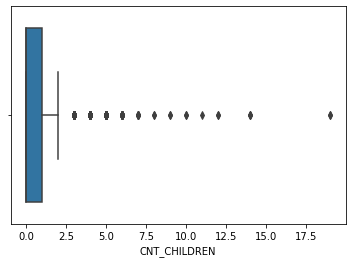

In [43]:
# box-plot on CNT_CHILDREN
sns.boxplot(inp0_df['CNT_CHILDREN'])
plt.show() 

When we plot a box-plot, we can see some values are as high as 19, which lies far from the general case. Hence it is an outlier.


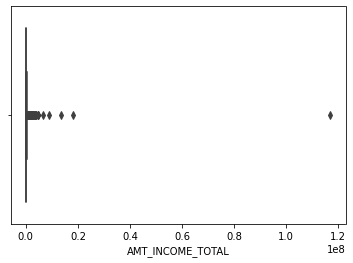

In [44]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers
sns.boxplot(inp0_df['AMT_INCOME_TOTAL'])
plt.show() 

Here, in the coloumn 'AMT_INCOME_TOTAL' which tells us the income of the client. We observe a value of 117M which is surely an outlier.

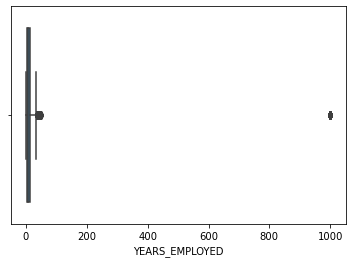

In [45]:
# boxplot for 'YEARS_EMPLOYED' 
## Convert it to year and plot box

sns.boxplot(inp0_df['YEARS_EMPLOYED'])
plt.show()

Here, in the coloumn 'YEARS_EMPLOYED' ( which we have converted years from DAYS_EMPLOYED), tells how many days before the application the person started current employment. We observe there is a value far at more than 1000 yrs. which makes the case for it being an outlier.

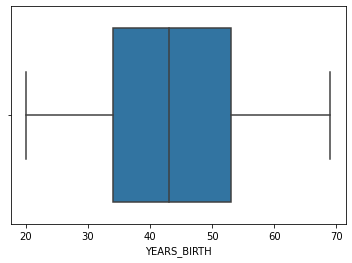

In [46]:
# box-plot for YEARSS_BIRTH
sns.boxplot(inp0_df['YEARS_BIRTH'])
plt.show() 

We do not find any outliers in the coloumn YEARS_BIRTH .

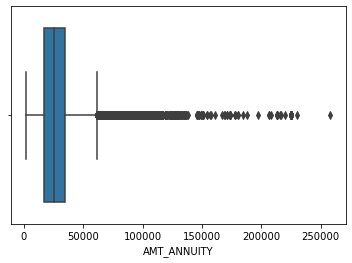

In [47]:
# box-plot for AMT_ANNUITY
sns.boxplot(inp0_df['AMT_ANNUITY'])
plt.show()

In [48]:
# display records AMT_ANNUITY > 200K  to confirm it an outlier
inp0_df[inp0_df['AMT_ANNUITY'] > 250000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
17948      120926       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
17948               N             2          783000.0   4050000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
17948     258025.5        4050000.0   Unaccompanied  Commercial associate   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
17948    Higher education            Married  House / apartment   

       REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
17948                    0.009549           41               0   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE  \
17948                   4                12           1        Managers   

       CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
17948              4.0                   THURSDAY                       14   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
17948                       1                       1   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
17948                        1  Industry: type 4      0.706927      0.553165   

       YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
17948                       0.9851         0.1667   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
17948                        0.9851          0.1667   

       YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
17948                        0.9851          0.1667          0.0356   

      EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
17948                  No                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
17948                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
17948                     5.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
17948                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
17948                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  \
17948                         0.0        VERY_HIGH        VERY_HIGH   

      YEARS_BIRTH_BINS  
17948       Middle_Age

Here, as we see that Amount Credit is way bigger than the total income hence an outlier.

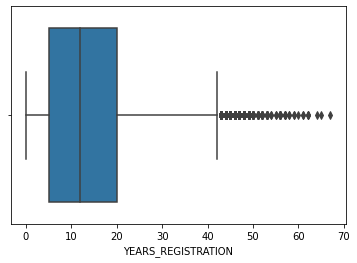

In [49]:
# box-plot for DAYS_REGISTRATION

# Converted to year

sns.boxplot(inp0_df['YEARS_REGISTRATION'])
plt.show()


In [50]:
# Check days of registration greater than 40 years
inp0_df[inp0_df['YEARS_REGISTRATION'] > 40]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
500         100577       0         Cash loans           F            N   
900         101037       0         Cash loans           F            N   
1202        101417       0         Cash loans           F            N   
1452        101707       0         Cash loans           F            N   
1616        101895       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
304978      453339       0    Revolving loans           M            Y   
305091      453471       0         Cash loans           F            N   
305795      454297       0         Cash loans           M            Y   
306065      454609       0         Cash loans           F            N   
306117      454671       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
500                  Y             0          171000.0    555273.0   
900                  N             0          247500.0    747000.0   
1202                 Y             2          103500.0    286704.0   
1452                 N             0          135000.0    254700.0   
1616                 Y             0          157500.0    675000.0   
...                ...           ...               ...         ...   
304978               N             0          202500.0    180000.0   
305091               Y             0          256050.0    675000.0   
305795               Y             0          157500.0    566055.0   
306065               N             0          166500.0    971280.0   
306117               Y             0           54000.0    295168.5   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
500         15912.0         463500.0           Family        Pensioner   
900         38268.0         747000.0           Family        Pensioner   
1202        20520.0         247500.0    Unaccompanied          Working   
1452        14620.5         225000.0    Unaccompanied        Pensioner   
1616        28507.5         675000.0    Unaccompanied        Pensioner   
...             ...              ...              ...              ...   
304978       9000.0         180000.0    Unaccompanied        Pensioner   
305091      65758.5         675000.0    Unaccompanied        Pensioner   
305795      18387.0         472500.0    Unaccompanied          Working   
306065      51876.0         900000.0    Unaccompanied        Pensioner   
306117      14197.5         238500.0  Spouse, partner        Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
500                   Lower secondary               Married   
900     Secondary / secondary special                 Widow   
1202    Secondary / secondary special  Single / not married   
1452                 Higher education  Single / not married   
1616                 Higher education  Single / not married   
...                               ...                   ...   
304978  Secondary / secondary special               Married   
305091  Secondary / secondary special                 Widow   
305795  Secondary / secondary special               Married   
306065  Secondary / secondary special                 Widow   
306117  Secondary / secondary special               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  YEARS_BIRTH  \
500       House / apartment                    0.024610           63   
900       House / apartment                    0.026392           61   
1202      House / apartment                    0.010966           46   
1452      House / apartment                    0.024610           66   
1616      House / apartment                    0.026392           60   
...                     ...                         ...          ...   
304978    House / apartment                    0.007020           62   
305091    House / apartment                    0.072508 

Here, in the coloumn 'YEARS_REGISTRATION' which how many days before the application did client change his registration. We observe a value which is greater that 70years which is surely an outlier.

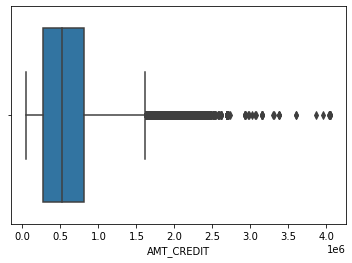

In [51]:
# box-plot for AMT_CREDIT
sns.boxplot(inp0_df['AMT_CREDIT'])
plt.show()



This variable indicates Credit amount of the loan as we can see from the graph there are few outliers.
we will check these values to confirm.

In [52]:
inp0_df[inp0_df['AMT_CREDIT']> 3.5*1000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14643       117085       0         Cash loans           F            Y   
14852       117337       0         Cash loans           M            N   
17948       120926       0         Cash loans           M            Y   
53936       162494       0         Cash loans           M            Y   
95571       210956       0         Cash loans           M            N   
104577      221360       0         Cash loans           M            Y   
110459      228135       0         Cash loans           M            N   
119380      238431       0         Cash loans           F            Y   
119681      238782       0         Cash loans           M            Y   
120757      240007       0         Cash loans           M            N   
133766      255139       0         Cash loans           F            Y   
186230      315893       1         Cash loans           F            N   
287732      433294       0         Cash loans           F            Y   
288455      434170       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14643                N             2          749331.0   3956274.0   
14852                Y             1          760846.5   4050000.0   
17948                N             2          783000.0   4050000.0   
53936                N             0          900450.0   3600000.0   
95571                Y             0          430650.0   4031032.5   
104577               N             0          468000.0   3600000.0   
110459               N             2          864900.0   4050000.0   
119380               N             0          292050.0   3860019.0   
119681               Y             1          931365.0   4050000.0   
120757               N             0          587250.0   4050000.0   
133766               N             1         1307587.5   4050000.0   
186230               N             0          458550.0   4027680.0   
287732               N             1          405000.0   4050000.0   
288455               N             1          450000.0   4050000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
14643      197230.5        3825000.0   Unaccompanied  Commercial associate   
14852      146002.5        4050000.0   Unaccompanied  Commercial associate   
17948      258025.5        4050000.0   Unaccompanied  Commercial associate   
53936       91008.0        3600000.0   Unaccompanied  Commercial associate   
95571      102033.0        3712500.0   Unaccompanied               Working   
104577      91138.5        3600000.0             NaN         State servant   
110459     102384.0        4050000.0   Unaccompanied  Commercial associate   
119380      97578.0        3555000.0   Unaccompanied  Commercial associate   
119681     102514.5        4050000.0   Unaccompanied  Commercial associate   
120757     106969.5        4050000.0   Unaccompanied  Commercial associate   
133766     100197.0        4050000.0   Unaccompanied  Commercial associate   
186230     106380.0        3600000.0   Unaccompanied  Commercial associate   
287732     102514.5        4050000.0   Unaccompanied  Commercial associate   
288455     106839.0        4050000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
14643                Higher education               Married   
14852                Higher education               Married   
17948                Higher education               Married   
53936                Higher education  Single / not married   
95571                Higher education  Single / not married   
104577               Higher education               Married   
110459               Higher education               Married   
119380               Higher education               Married   
119681               Higher education               Married   
120757               Higher education        

As we can see from the values above, the AMT_CREDIT  is greater than AMT_INCOME_TOTAL in all the cases and then its greater than most values, so this is an outlier.

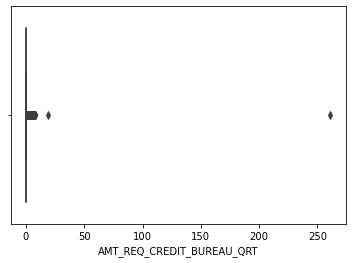

In [53]:
# Box-plot AMT_REQ_CREDIT_BUREAU_QRT

sns.boxplot(inp0_df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

This variable indicates the  Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
as we can see from the plot above there are two outlier. We can confirm further on this as below counts check.

In [54]:
# Check to records, one which is greater than 10
inp0_df[inp0_df['AMT_REQ_CREDIT_BUREAU_QRT'] >10 ]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
239474      377322       0         Cash loans           F            N   
253541      393383       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239474               Y             1          360000.0   1035000.0   
253541               Y             1          202500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
239474      30393.0        1035000.0   Unaccompanied          Working   
253541      34596.0         675000.0          Family          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
239474               Higher education               Married   
253541  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  YEARS_BIRTH  \
239474  House / apartment                    0.026392           37   
253541  House / apartment                    0.026392           52   

        YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  \
239474               9                   9                 8           1   
253541               3                  32                 5           1   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
239474     Accountants              3.0                     MONDAY   
253541        Laborers              2.0                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  \
239474                       19                       0   
253541                        9                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
239474                       0                        0   
253541                       0                        0   

             ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
239474  Business Entity Type 2      0.663803           NaN   
253541            Construction      0.007160           NaN   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
239474                       0.9945         0.3750   
253541                       0.9821         0.3333   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
239474                        0.9945          0.3750   
253541                        0.9821          0.3333   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
239474                        0.9945          0.3750          0.1289   
253541                        0.9821          0.3333          0.0464   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
239474                  No                       3.0   
253541                  No                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
239474                       0.0                       3.0   
253541                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
239474                       0.0                   695.0   
253541                       0.0                    65.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
239474                         0.0                        0.0   
253541                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
239474                         0.0                        1.0   
253541                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
239474                      261.0                         0.0   
253541                       19.0                         2.0   

       AMT_INCOME_RANGE AMT_CREDIT_RANGE YEARS_BIRTH_BINS  
239474        VERY_HIGH             HIGH       Middle_Age  
253541           MEDIUM           MEDIUM       Middle_Age

## 5.2 Checking the distribution

In [55]:
# Distribution of 'OCCUPATION_TYPE'
inp0_df1 = inp0_df['OCCUPATION_TYPE'].value_counts().rename_axis('unique_values').to_frame('cnt')

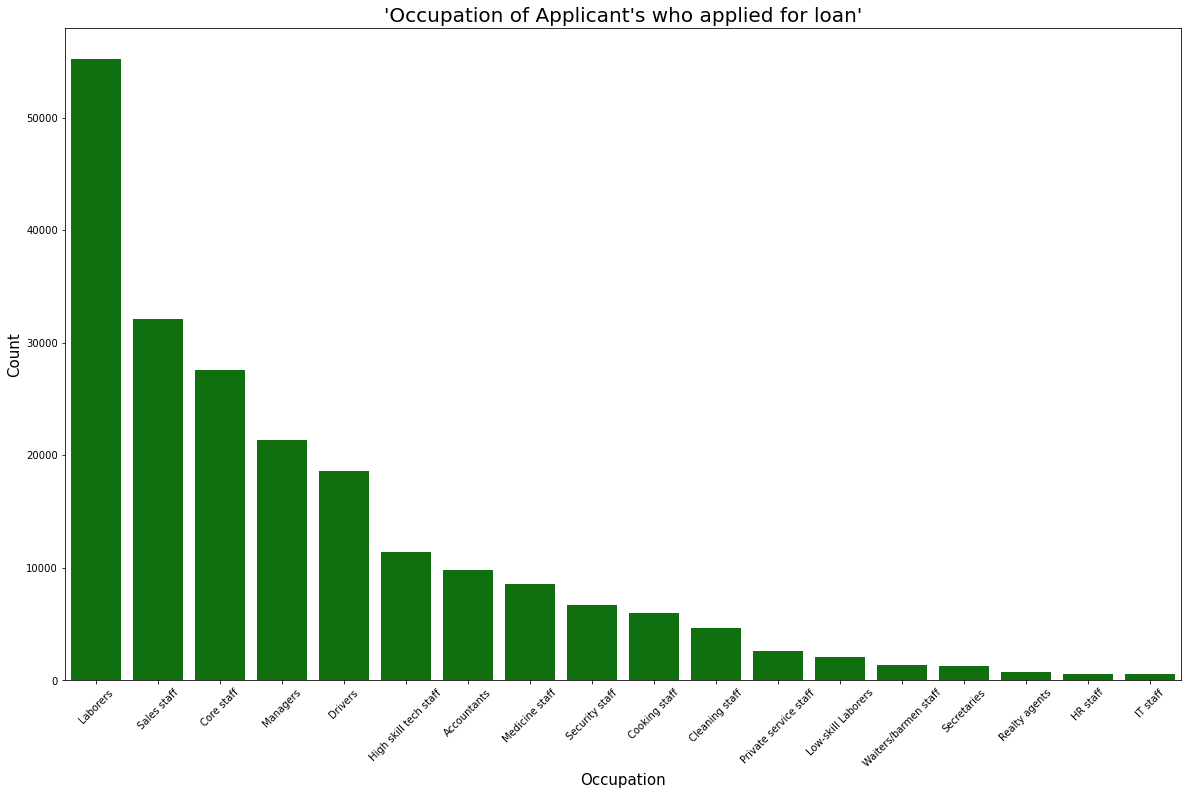

In [56]:
plt.figure(figsize=[20,12])
sns.barplot(x= inp0_df1.index, y=inp0_df1.cnt, color='green')
plt.title("'Occupation of Applicant\'s who applied for loan'", fontsize= 20)
plt.xlabel("Occupation", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45)
plt.show()

We can observer that Labourers, Sales Staff and Core Staff constitute the majority whereas IT Staff is on the lower side.

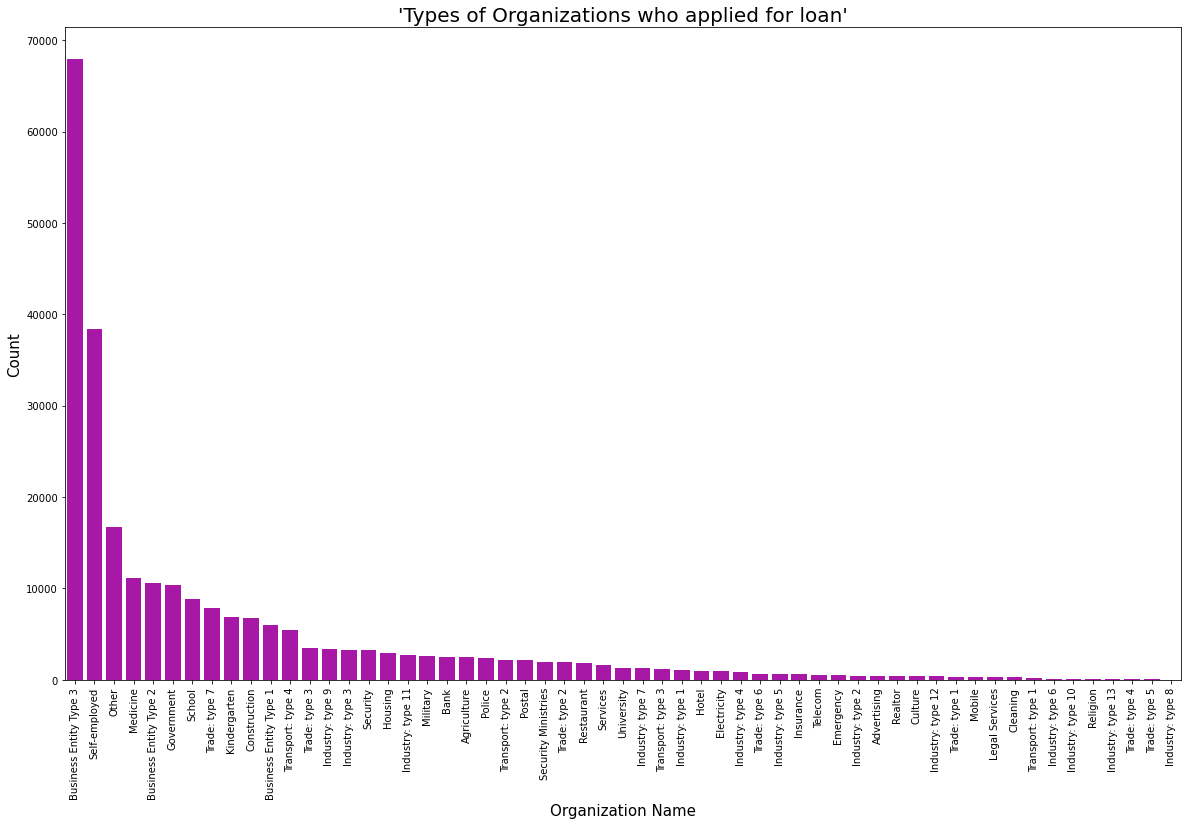

In [57]:
# Distribution of 'ORGANIZATION_TYPE'
inp0_df2 = inp0_df['ORGANIZATION_TYPE'].value_counts().rename_axis('unique_values').to_frame('cnt')
plt.figure(figsize=[20,12])
sns.barplot(x= inp0_df2.index, y=inp0_df2.cnt, color='m')
plt.title("'Types of Organizations who applied for loan'", fontsize= 20)
plt.xlabel("Organization Name", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=90)
plt.show()

We can observe that Business Entity Type 3 and then Self-employed organizations have majority of the loan applications.

## 5.3  Checking Imbalance

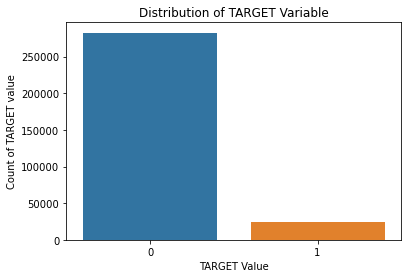

In [58]:
#Target Imbalance Distribution

#checking the distribution of target variable
sns.countplot(inp0_df['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable")
plt.show()

In [59]:
# Imbalance Ratio
inp0_df['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [60]:
# calculating data imbalance 
imbal_ratio = len(inp0_df[inp0_df.TARGET == 0])/len(inp0_df[inp0_df.TARGET == 1])
imbal_ratio


11.387150050352467

The imbalance is high between target variables. imbal_ratio" indiactes that for every 1 there are almost 11 0s.
 

## 5.4 Dividing the dataset into two different datasets based upon 'Target' value.

In [61]:
inp0_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [62]:
# Dividing the original dataset into two different datasets depending upon the target value
H0 = inp0_df.loc[inp0_df.TARGET == 0]
H1 = inp0_df.loc[inp0_df.TARGET == 1]

## 5.5 Univariate Analysis of Categorical Variables

#####  Function to use to plot for univariate of some categorical variables

In [63]:
def univar_plot(feature,title):
    
    # Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    H0_np = H0[feature].value_counts().rename_axis('unique_values').to_frame('cnt')
    H1_p  = H1[feature].value_counts().rename_axis('unique_values').to_frame('cnt')


    fig.add_trace(go.Pie(labels=H0_np.index, values=H0_np.cnt, name="Non-Pay Difficulties"),
              1, 1)
    fig.add_trace(go.Pie(labels=H1_p.index, values=H1_p.cnt, name="Pay Difficulties"),
              1, 2)
    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.5, hoverinfo="label+percent+name")

    fig.update_layout(
    title_text=title,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='H0', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='H1', x=0.80, y=0.5, font_size=20, showarrow=False)])
    fig.show()



#### Gender

In [64]:
univar_plot('CODE_GENDER','Gender Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')

Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage in Male Payment Difficulties from Non-Payment Difficulties

#### Income Source

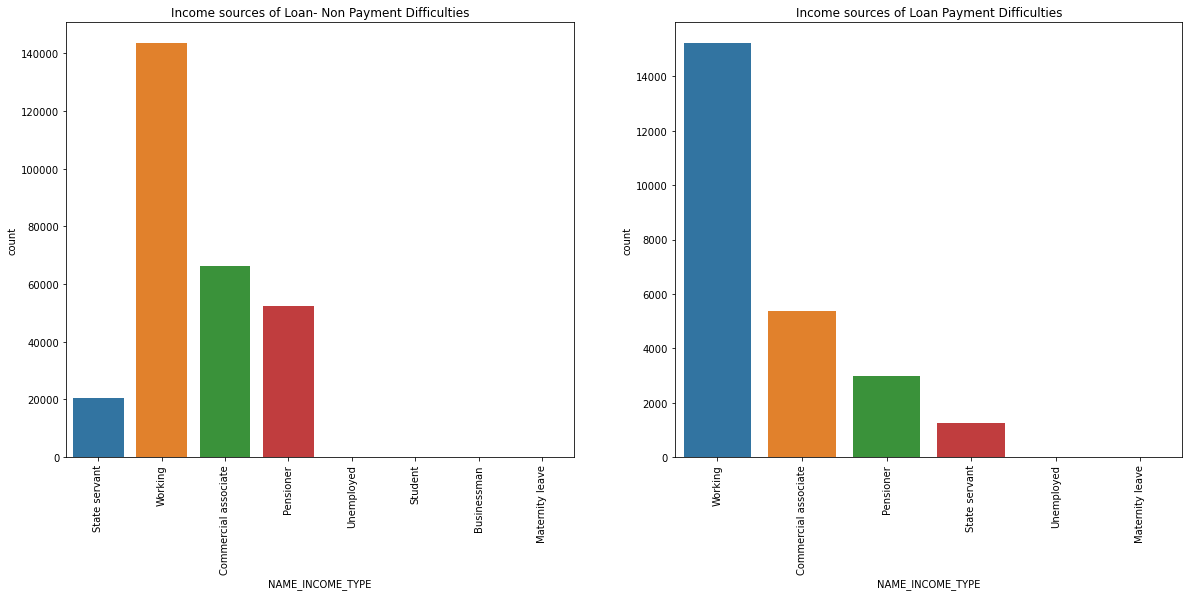

In [65]:
# Income sources of Loan- Non Payment Difficulties vs Loan Payment Difficulties

plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(H0['NAME_INCOME_TYPE'])
plt.title('Income sources of Loan- Non Payment Difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(H1['NAME_INCOME_TYPE'])
plt.title('Income sources of Loan Payment Difficulties')
plt.xticks(rotation=90)
plt.show()


We observe from the above bar chart that Working and commercial associates have very high percentage of customers in loan non payment difficulties category.  
The  same holds true for customers in loan payment difficulties category. 
However, their ratio is around 10:1.   

#### Family Status

In [66]:
## Family Status of Loan- Non Payment Difficulties  vs  Loan Payment Difficulties

univar_plot('NAME_FAMILY_STATUS','Family Status Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')


We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties

#### Education

In [67]:
# Education of Loan- Non Payment Difficulties Vs # Education of Loan Payment Difficulties

univar_plot('NAME_EDUCATION_TYPE','Education Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')




We observe an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of Loan Payment Difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties

#### Housing

In [68]:
# Type of House of Loan- Non Payment Difficulties  VS
# Type of House of Loan Payment Difficulties

univar_plot('NAME_HOUSING_TYPE','Type of House Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')

We observe an increase in the percentage of Payment Difficulties who live with their parents and then also those who lives in rented apartment when compared to the percentages of Payment Difficulties and non-Payment Difficulties

#### Income Range

In [69]:
# Income range of Loan-Non Payment Difficulties VS
# Income range of Loan Payment Difficulties

univar_plot('AMT_INCOME_RANGE','Income Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')




We observe an increase in the percentage of Loan Payment Difficulties whose income is low when compared with the percentages of Payment Difficulties and Loan-Non Payment Difficulties

#### Age

In [70]:
# Age of Loan-Non Payment Difficulties  VS
# Age of Loan Payment Difficulties
univar_plot('YEARS_BIRTH_BINS','Group by Age Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')



We observe that there is an increase in the percentage of Loan Payment Difficulties who are young in age (i.e between 25 -35 years of age), when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties.

#### Type of Loan

In [71]:
# Types of Loans taken by Loan-Non Payment Difficulties  VS
# Types of Loans taken by Loan Payment Difficulties 

univar_plot('NAME_CONTRACT_TYPE','Type of loans Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')


We can observe that cash loans are preffered by both Loan Payment Difficulties and Loan-Non Payment Difficulties although there is a decrease in the percentage of Payment Difficulties who opt for revolving loans.

#### Accompanyed By

In [72]:
# Loan-Non Payment Difficulties are Accompanied by VS
# Loan Payment Difficulties are Accompanied by

univar_plot('NAME_TYPE_SUITE','Accompanyed By Distribution Loan- Non Payment Difficulties Vs  Loan Payment Difficulties')



We do not observe any major changes here.

#### Organization Type

In [73]:
# Types of Organizations who applied for loan - Non-Payment Difficulties VS
# Types of Organizations who applied for loan Payment Difficulties

H0_npc = H0['ORGANIZATION_TYPE'].value_counts().rename_axis('unique_values').to_frame('cnt')
H1_pc  = H1['ORGANIZATION_TYPE'].value_counts().rename_axis('unique_values').to_frame('cnt')



fig = go.Figure()
fig.add_trace(go.Bar(x=H0_npc.index,
                y=H0_npc.cnt,
                name='H0',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=H1_pc.index,
                y=H1_pc.cnt,
                name='H1',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Types of Organizations who applied for loan - Non Payment Difficulties vs Payment Difficulties',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Counts',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

We can observe customers of organisation type Business Entity 3 are mostly non defaulters followed by self-employed and Other.

## 5.6 Univariate Analysis of Numerical Variables on the basis of 'Target' Variable

#### Function for ploting Univariate box plot for some numeric variables.

In [74]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Non-Payment Difficulties vs Payment Difficulties

def univarnum_plot(feature,title):
    temp0 = H0[feature].value_counts()
    temp1 = H1[feature].value_counts()
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

    fig = go.Figure()
    fig.add_trace(go.Box(
                    y=temp0.index,
                    name='H0 target0',
                    marker_color='rgb(55, 83, 109)'
                    ))
    fig.add_trace(go.Box(
                    y=temp1.index,
                    name='H1 target1',
                    marker_color='rgb(26, 118, 255)'
                    ))
    
    fig.update_layout(
        title=title,
        yaxis=dict(title=feature, zeroline=False)
    
    )
    fig.show()


#### Years of employement

In [75]:
#YEARS_EMPLOYED
univarnum_plot('YEARS_EMPLOYED','Distribution and Box plot for Years of employment for loan - Non Payment Difficulties vs Payment Difficulties')


Results are almost similar for both categories.

#### Age

In [76]:
#YEARS_BIRTH_BINS

univarnum_plot('YEARS_BIRTH','Distribution and Box plot for Years of employment for loan - Non Payment Difficulties vs Payment Difficulties')

Results are almost similar.

#### Good Price

In [77]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan- Non-Payment Difficulties VS
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan Payment Difficulties

univarnum_plot('AMT_GOODS_PRICE','Distribution and Box plot for Goods Price for loan - Non Payment Difficulties vs Payment Difficulties')

Results are almost similar in both categories.

## 5.7 Bivariate Analysis

#### 5.7.1 Bivariate Analysis of Categorical-Categorical


#### Function for ploting Bivariate of Categorical-Categorical variables

In [78]:
def biplot_cat(feature1,feature2,title1,title2):
    
    plt.figure(figsize=(20,8)) 

    plt.subplot(1,2,1)
    total0 = float(len(H0))
    ax = sns.countplot(data=H0,x=feature1,hue=feature2)
    plt.title(title1)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total0)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.legend(title=feature2, loc='upper right')


    plt.subplot(1,2,2)
    total1 = float(len(H1))
    ax = sns.countplot(data=H1,x=feature1,hue=feature2)
    plt.title(title2)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.legend(title=feature2, loc='upper right')
    plt.show()

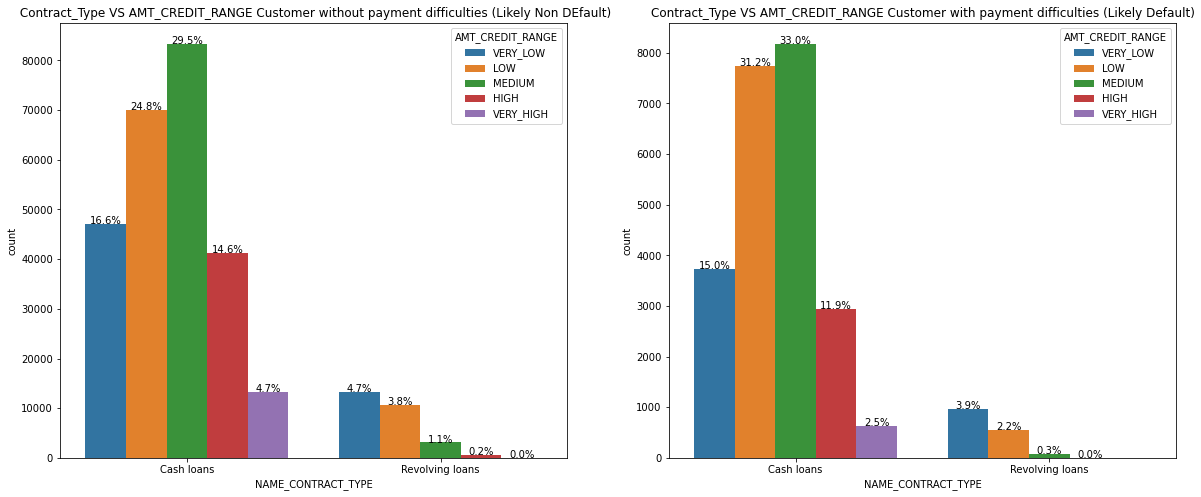

In [79]:
# NAME_CONTRACT_TYPE VS AMT_CREDIT_RANGE

biplot_cat('NAME_CONTRACT_TYPE','AMT_CREDIT_RANGE',' Contract_Type VS AMT_CREDIT_RANGE Customer without payment difficulties (Likely Non DEfault)','Contract_Type VS AMT_CREDIT_RANGE Customer with payment difficulties (Likely Default)')

From the plot above we can say that clients who need  medium and low amount loan, go for 'Cash loans'.

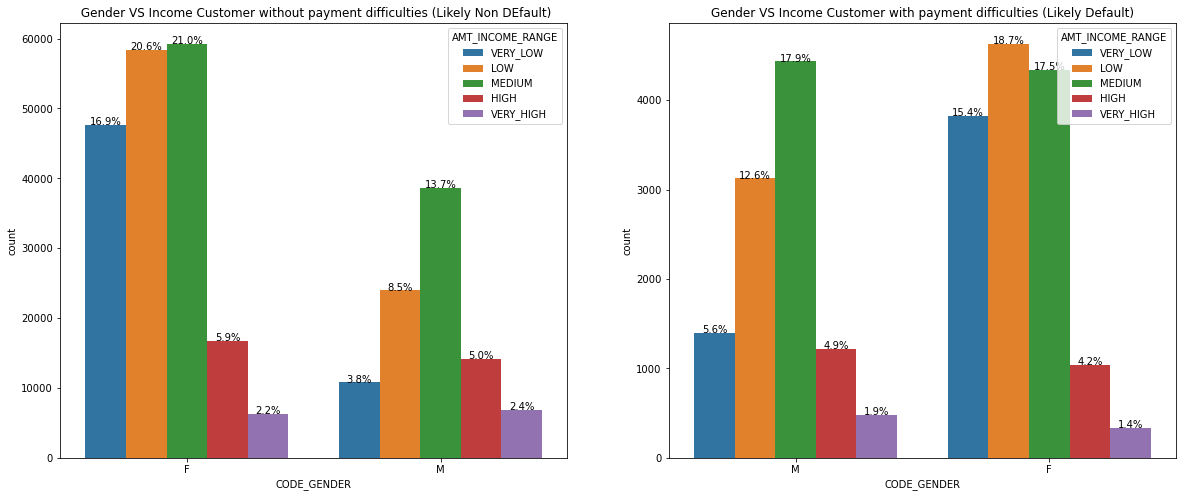

In [80]:
# 'CODE_GENDER' VS'AMT_INCOME_RANGE


biplot_cat('CODE_GENDER','AMT_INCOME_RANGE',' Gender VS Income Customer without payment difficulties (Likely Non DEfault)','Gender VS Income Customer with payment difficulties (Likely Default)')

From the plot above we can say that Very-Low, Low, and Medium income range customers dominate both the categories. However, non-defaulters vs defaluters ration is around 15:1.

#### 5.7.2  Bivariate Analysis of Categorical vs Numerical Variables

#### Function to plot Bivariate Analysis of Categorical vs Numerical Variables

In [81]:
def biplot_catnum(feature1,feature2,title1,title2):
    plt.figure(figsize=(20,8)) 

    plt.subplot(1,2,1)
    ax = sns.boxplot(data=H0,y=feature1,x=feature2)
    plt.title(title1)
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    ax = sns.boxplot(data=H1,y=feature1,x=feature2)
    plt.title(title2)
    plt.xticks(rotation=90)
    plt.show()

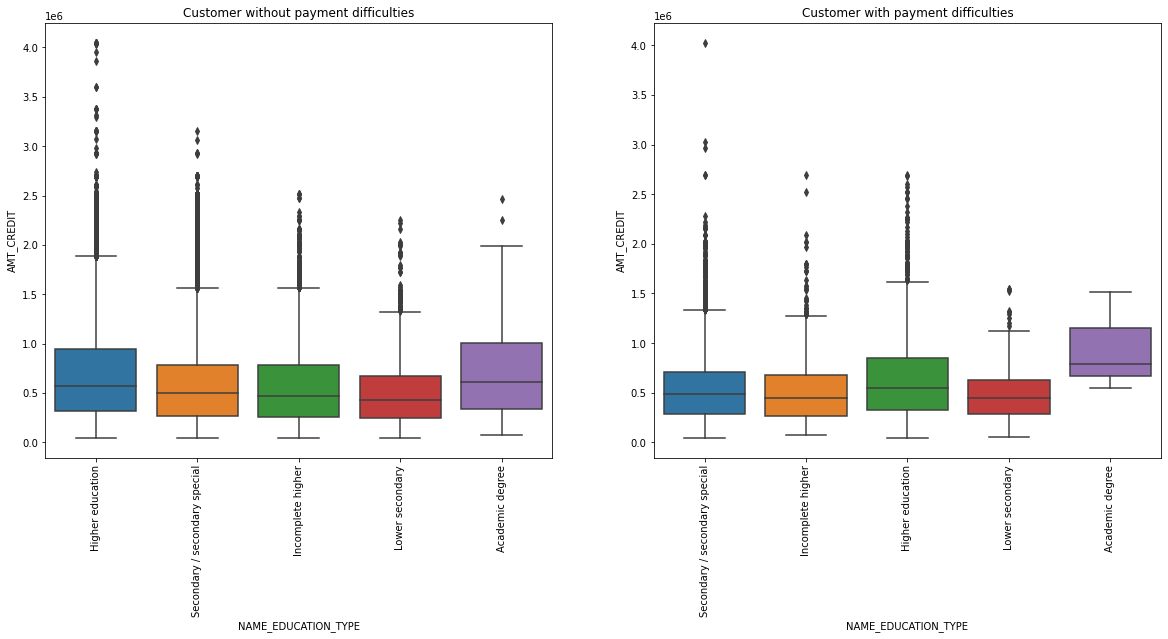

In [82]:
# AMT_CREDIT  VS NAME_EDUCATION_TYPE

biplot_catnum('AMT_CREDIT','NAME_EDUCATION_TYPE','Customer without payment difficulties','Customer with payment difficulties')

The count of customers without payment difficulties of Higher education category is more than the customer with payment difficulties of same category. And the rest of the education type is almost same for both the cases.

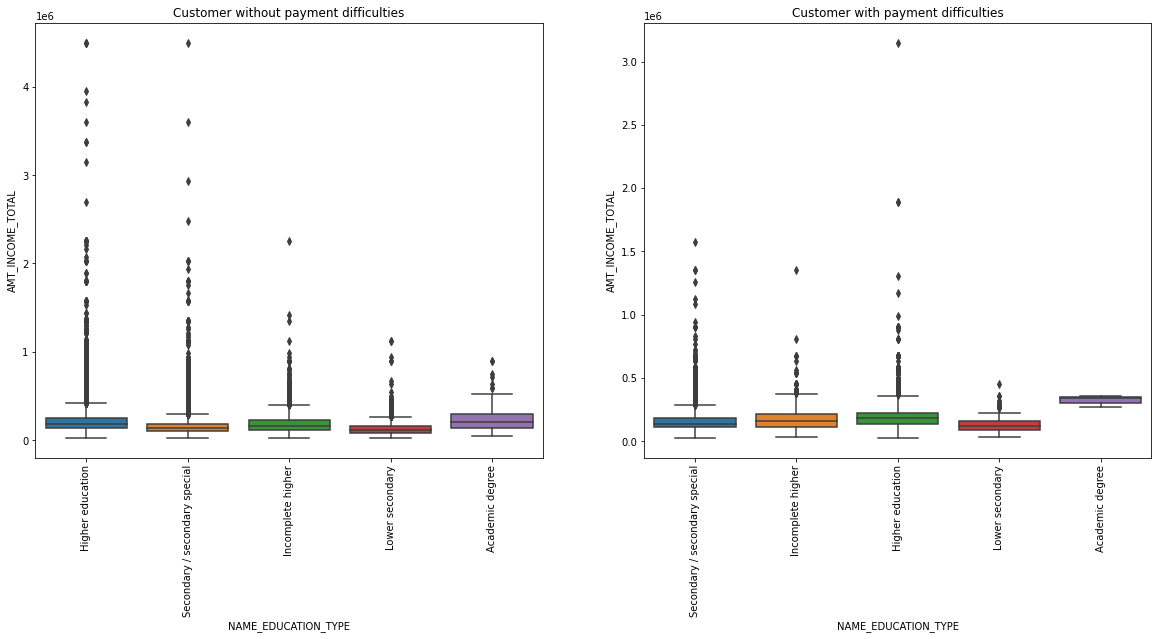

In [83]:
# AMT_INCOME_TOTAL VS NAME_EDUCATION_TYPE

plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=H0[H0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=H1[H1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Customers without payment difficulties are on higher income side

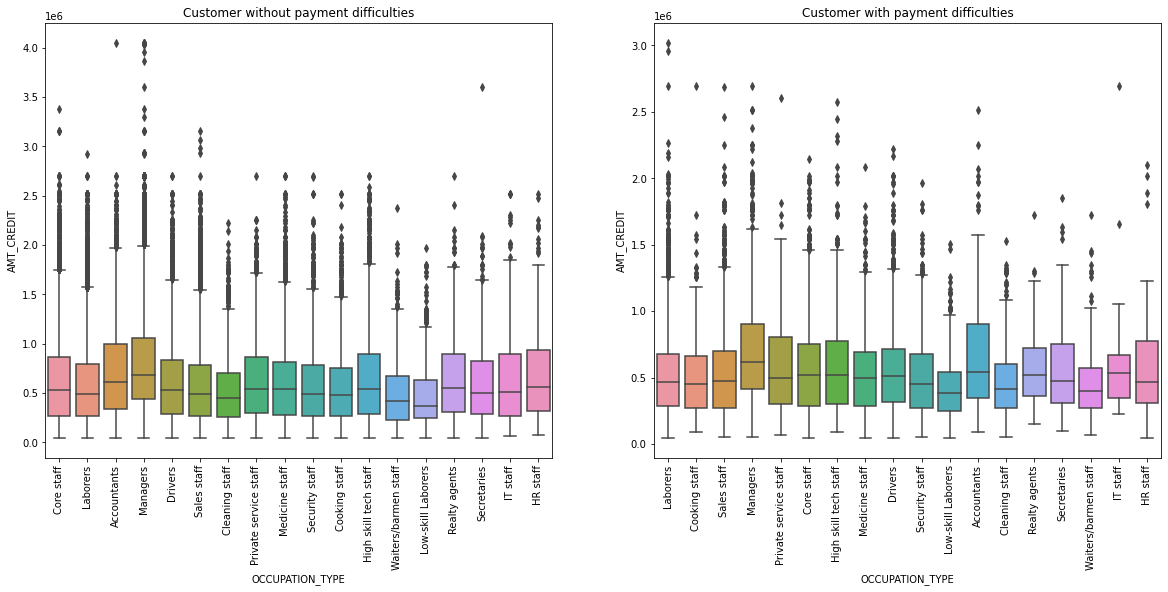

In [84]:
# AMT_CREDIT' VS 'OCCUPATION_TYPE

biplot_catnum('AMT_CREDIT','OCCUPATION_TYPE','Customer without payment difficulties','Customer with payment difficulties')

Customers without payment difficulties have higher credit amount.

#### 5.7.3 Bivariate Analysis of Numerical vs Numerical Variables

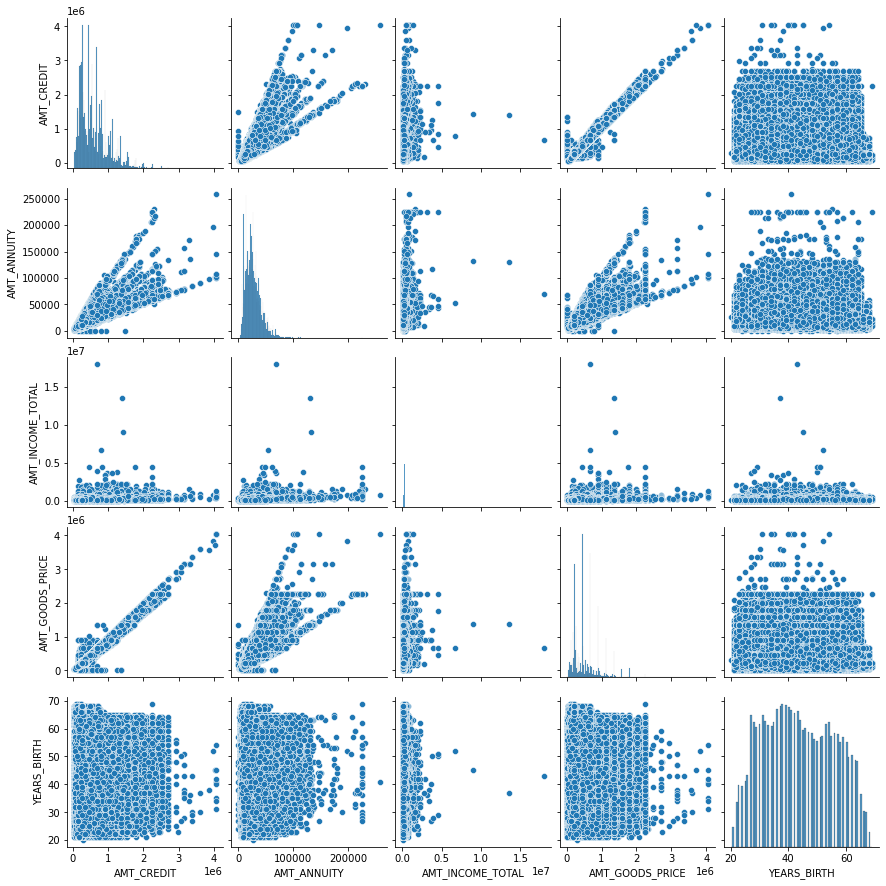

In [85]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = H0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

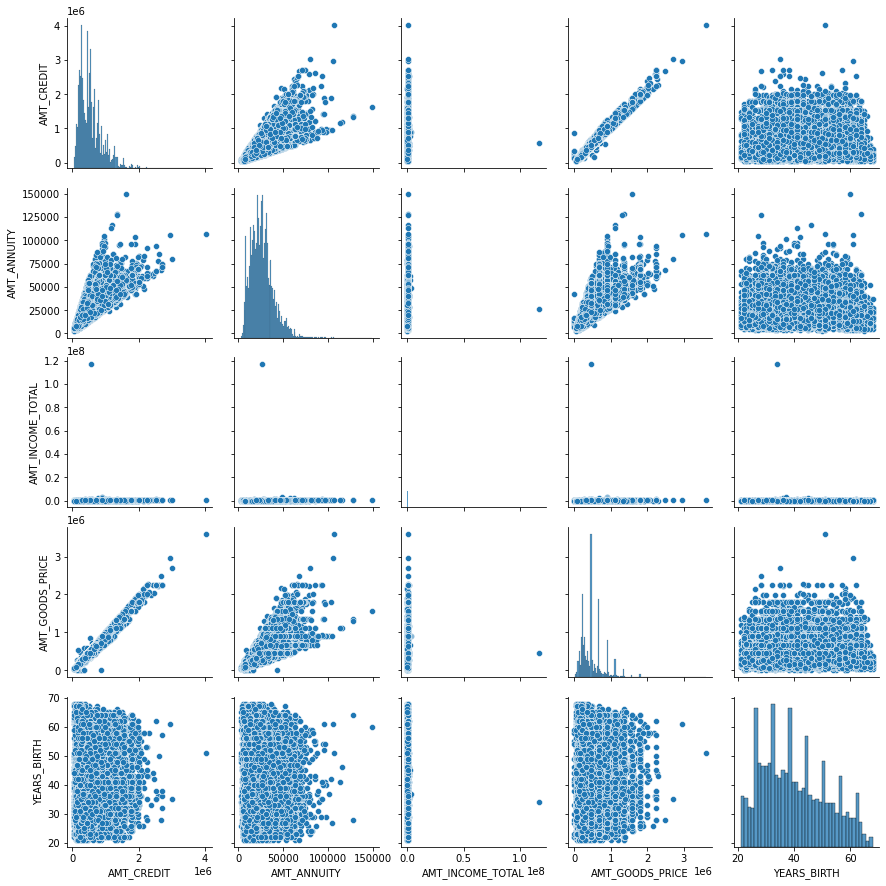

In [86]:
#Pairplot for Target 1 (Loan-Payment Difficulties)
pair = H1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

Pair-plot shows similar graphs for bothe the categories

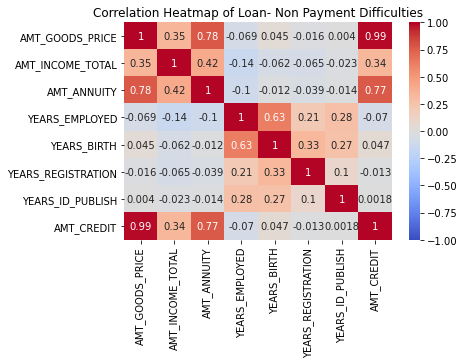

In [87]:
# Heatmap for Loan- Non Payment Difficulties
sns.heatmap(H0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','YEARS_BIRTH',
         'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(),annot = True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Correlation Heatmap of Loan- Non Payment Difficulties')
plt.show()

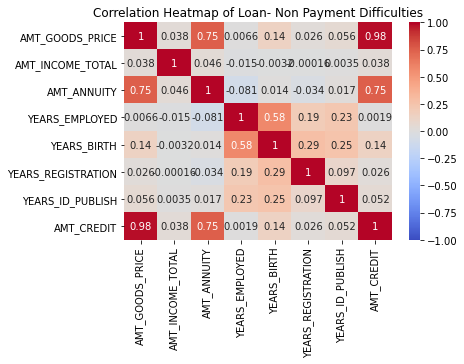

In [88]:
# Heatmap for Loan- Non Payment Difficulties
sns.heatmap(H1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','YEARS_BIRTH',
         'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(),annot = True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Correlation Heatmap of Loan- Non Payment Difficulties')
plt.show()

We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income.

## 5.8 Top 10 Correlation for client with payment difficulties

In [89]:
corr=H1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED',
  'YEARS_BIRTH', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [90]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [91]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

VAR1             VAR2  CORRELATION  CORR_ABS
56          AMT_CREDIT  AMT_GOODS_PRICE     0.983103  0.983103
16         AMT_ANNUITY  AMT_GOODS_PRICE     0.752699  0.752699
58          AMT_CREDIT      AMT_ANNUITY     0.752195  0.752195
35         YEARS_BIRTH   YEARS_EMPLOYED     0.582443  0.582443
44  YEARS_REGISTRATION      YEARS_BIRTH     0.288999  0.288999
52    YEARS_ID_PUBLISH      YEARS_BIRTH     0.252339  0.252339
51    YEARS_ID_PUBLISH   YEARS_EMPLOYED     0.229150  0.229150
43  YEARS_REGISTRATION   YEARS_EMPLOYED     0.192537  0.192537
32         YEARS_BIRTH  AMT_GOODS_PRICE     0.135603  0.135603
60          AMT_CREDIT      YEARS_BIRTH     0.135070  0.135070

The above dataframe shows top 10 correlation for clients with payment difficulties

In [92]:
# 
corr0=H0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED',
  'YEARS_BIRTH', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr0=corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool))
corr0_df=corr0.unstack().reset_index()
corr0_df.columns = ['VAR1','VAR2','CORRELATION']
corr0_df.dropna(subset=['CORRELATION'],inplace=True)
corr0_df['CORR_ABS']=corr0_df['CORRELATION'].abs()
corr0_df.sort_values('CORR_ABS', ascending=False).head(10)

VAR1              VAR2  CORRELATION  CORR_ABS
56          AMT_CREDIT   AMT_GOODS_PRICE     0.987250  0.987250
16         AMT_ANNUITY   AMT_GOODS_PRICE     0.776686  0.776686
58          AMT_CREDIT       AMT_ANNUITY     0.771309  0.771309
35         YEARS_BIRTH    YEARS_EMPLOYED     0.626028  0.626028
17         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953  0.418953
8     AMT_INCOME_TOTAL   AMT_GOODS_PRICE     0.349462  0.349462
57          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799  0.342799
44  YEARS_REGISTRATION       YEARS_BIRTH     0.332934  0.332934
51    YEARS_ID_PUBLISH    YEARS_EMPLOYED     0.276254  0.276254
52    YEARS_ID_PUBLISH       YEARS_BIRTH     0.270032  0.270032

The above dataframe shows top 10 correlation for clients with not payment difficulties

The top 3 correlation is same in both the categories

# 6. Analysis previous_application_df

#### 6.1 Data loading and cleaning

In [93]:
# loading the previous_application.csv
inp1= pd.read_csv('previous_application.csv')

inp1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [94]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [95]:
inp1.shape

(1670214, 37)

In [96]:
# chnaging the negative values in the columns whose name start with DAYS to positive values.
Days1_col = [col for col in inp1 if col.startswith('DAYS')]
inp1[Days1_col]= abs(inp1[Days1_col])

In [97]:
# XNA and XAP are replaced by NaN
inp1=inp1.replace('XNA', np.NaN)
inp1=inp1.replace('XAP', np.NaN)

In [98]:
# Value counts of Contract Status in previous application
inp1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

In [99]:
#checking the percentiles, min values for the file
inp1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503   8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150   1.000000e+00   
25%                 0.160716                  0.715645   2.800000e+02   
50%                 0.189122                  0.835095   5.810000e+02   
75%                 0.193330                  0.852537   1.300000e+03   
max                 1.000000                  1.000000   2.922000e+03   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342340.056543    15949.224065   
std        7.127443e+03  1.456729e+01        88413.495220    72007.270877   
min       -1.000000e+00  0.000000e+00            2.000000        2.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000      475.000000   
50%        3.000000e+00  1.200000e+01       365243.000000      921.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     1825.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

#### 6.2 Merging the application_data with previous application data

In [100]:
#merging the application_data with previous application data
both_df = pd.merge(left=inp0_df, right=inp1,how='inner', on='SK_ID_CURR',suffixes='_x')

In [101]:
#checking the new dataframe's shape
both_df.shape

(1413701, 90)

In [102]:
# The percentages of each type of contract status now
both_df['NAME_CONTRACT_STATUS'].value_counts()*100/len(both_df)

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

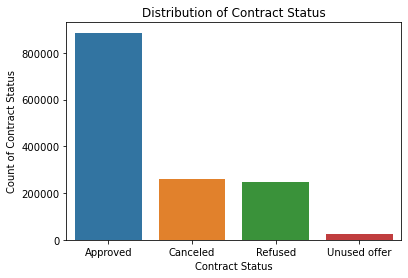

In [103]:
# Distribution of Contract Status
sns.countplot(both_df['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

#### 6.3  Dividing the new dataframe into 4 parts based on the contract status, i.e: Approved, refused, canceled, unused

In [104]:
# Divided by Contract Status
cs_approved = both_df[both_df['NAME_CONTRACT_STATUS']=='Approved']
cs_refused = both_df[both_df['NAME_CONTRACT_STATUS']=='Refused']
cs_canceled = both_df[both_df['NAME_CONTRACT_STATUS']=='Canceled']
cs_unused = both_df[both_df['NAME_CONTRACT_STATUS']=='Unused offer']


#### 6.4 Now that we know the different status of the loan. we will now examine the variables based on this, so as to get an idea of which varibale is doing what.

In [105]:
def multi_plot(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=cs_approved,x=variable_name)
    ax1.set_title("Approved", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=cs_refused,x=variable_name)
    ax2.set_title("Refused", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=cs_canceled,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=cs_unused,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    
    plt.show()






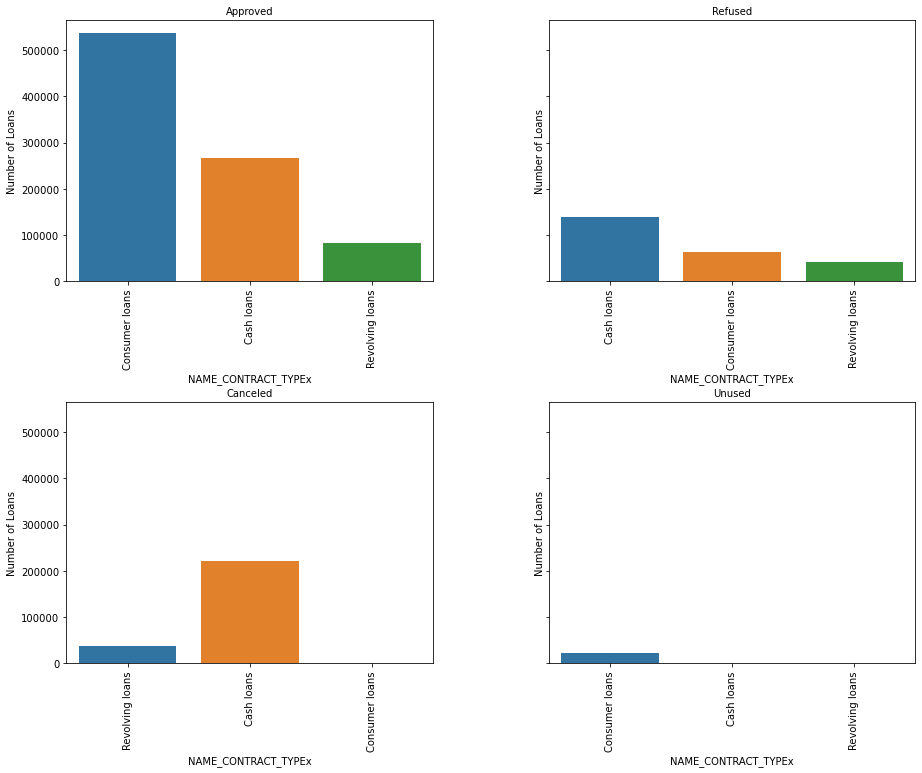

In [106]:
# NAME_CONTRACT_TYPEx VS CONTRACT_STATUS

multi_plot('NAME_CONTRACT_TYPEx')

Here we can see that the Consumer loans (CL) is much more acceptable as compare to the Cash loans and Revolving loans(RL).
Also we can see majority of Cash loans are either Cancelled or Refused as compare to the Consumer loans (CL) and Revolving loans(RL). 
When we look at the Unused Type, we can see only a few Consumer Loans only. 

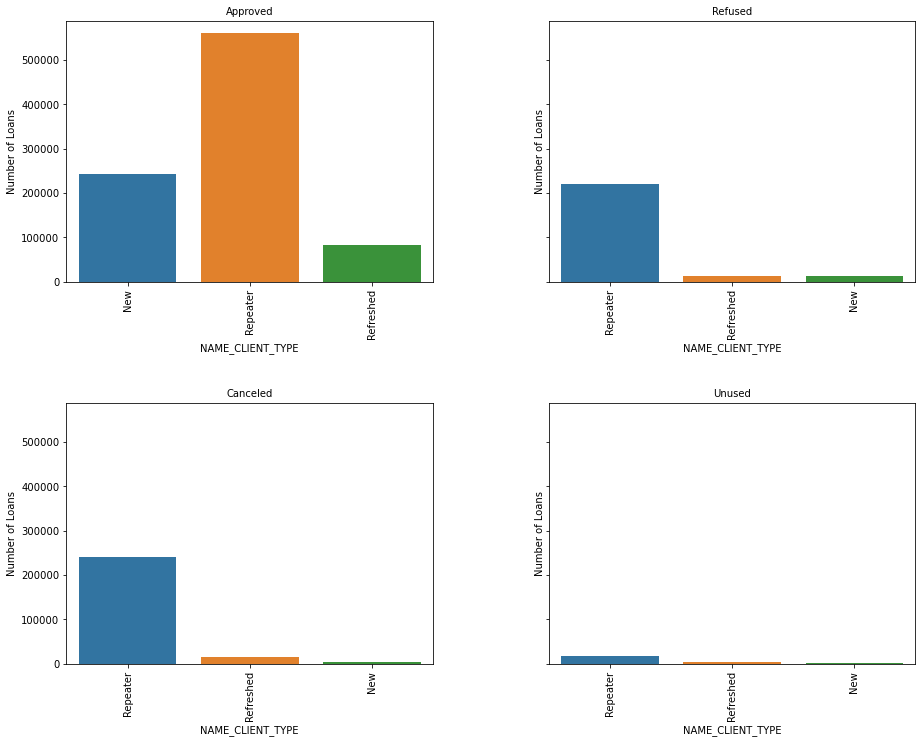

In [107]:
# ('NAME_CLIENT_TYPE') VS CONTRACT_STATUS

multi_plot('NAME_CLIENT_TYPE')

Here we can see that the Repeater is getting more Refused but also we can see that the it also getting more apporved and even that it is getting more canceled and more unused.

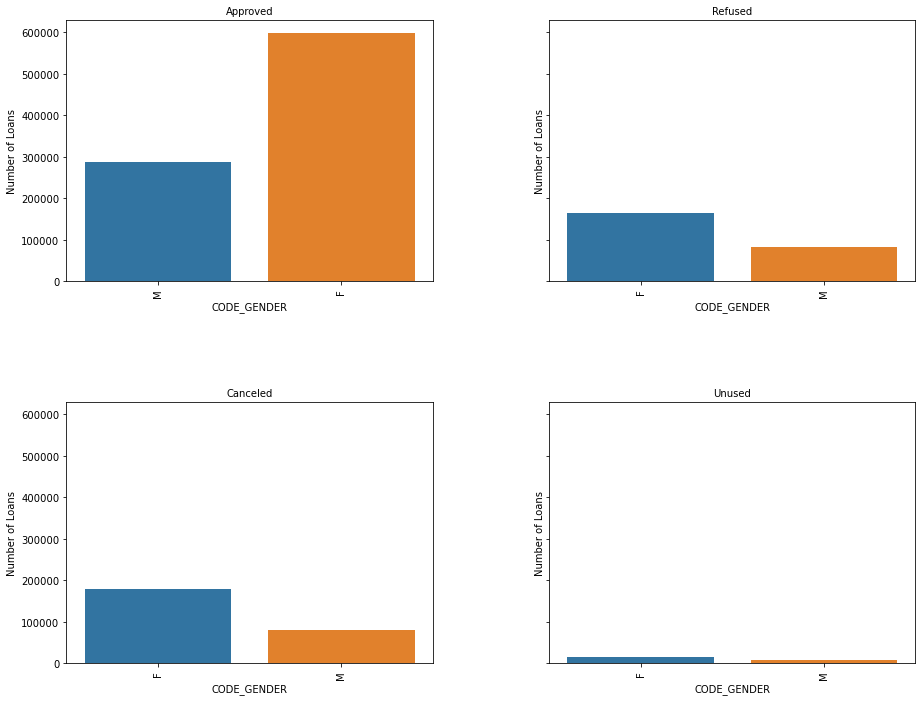

In [108]:
# ('CODE_GENDER') VS CONTRACT_STATUS
multi_plot('CODE_GENDER')


Here we can see that Female is getting more Refused more approved more canceled more unused but in case of male it is having average in every category.

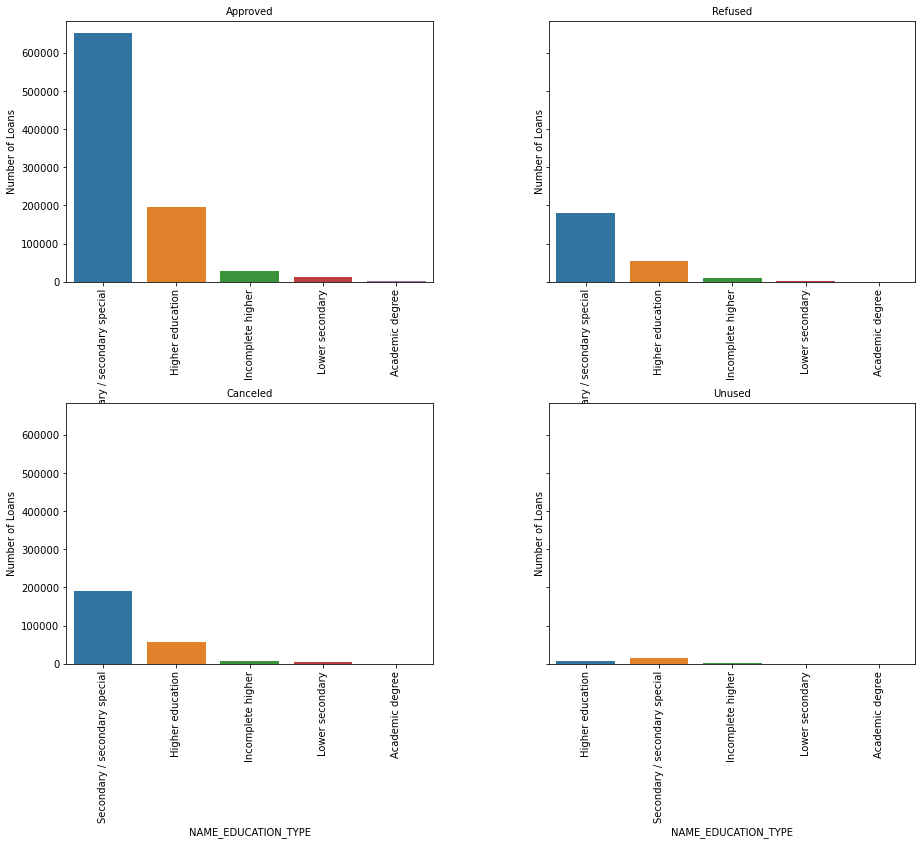

In [109]:
# NAME_EDUCATION_TYPE VS CONTRACT_STATUS
multi_plot('NAME_EDUCATION_TYPE')

Here we can see that Secondary/ Secondary special is more effective in every case

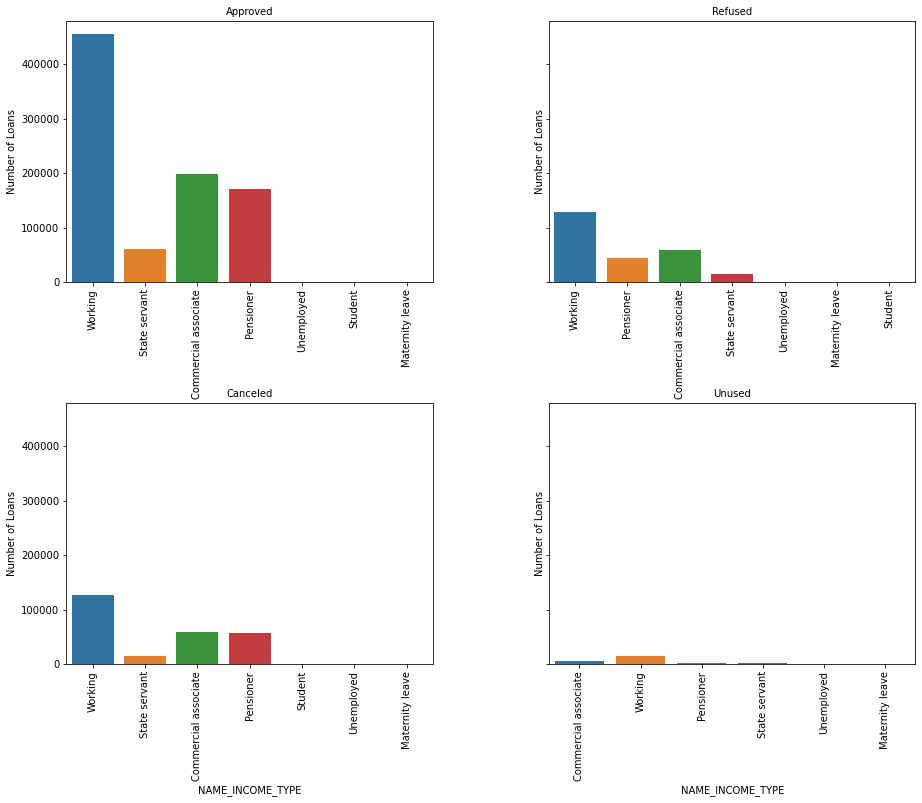

In [110]:
# NAME_INCOME_TYPE VS CONTRACT_STATUS
multi_plot('NAME_INCOME_TYPE')

Here we can see that the working type people are applying more loans as compare to others and also Commercial associates people are taking more loans.

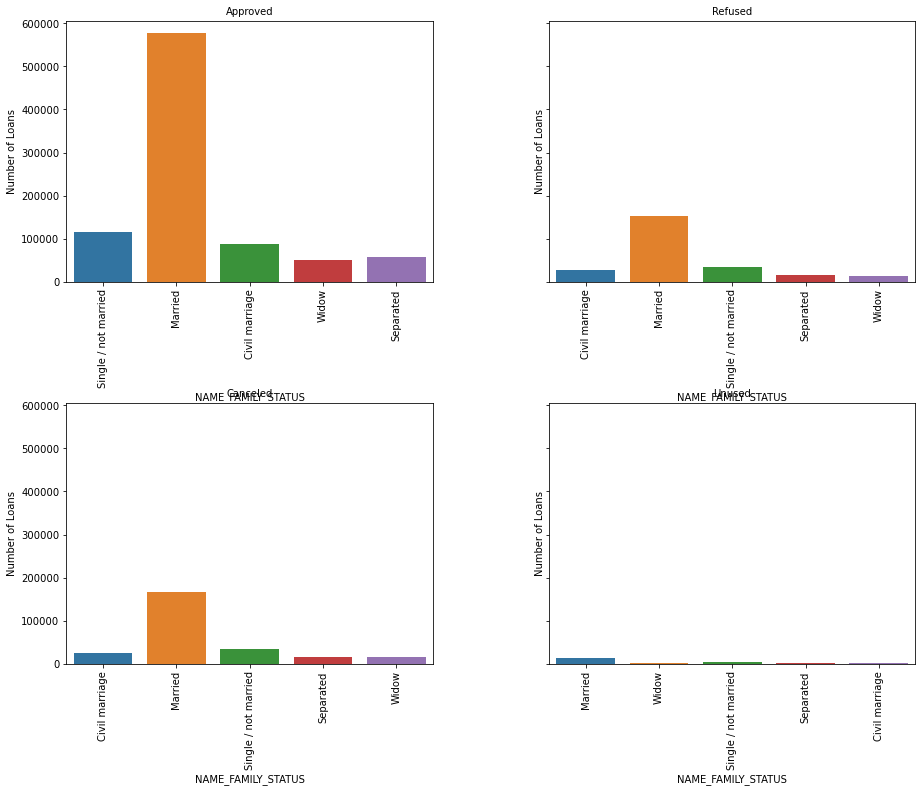

In [111]:
# NAME_FAMILY_STATUS VS CONTRACT_STATUS
multi_plot('NAME_FAMILY_STATUS')

Here we can see that the Married people are applying and taking loans more than the others.

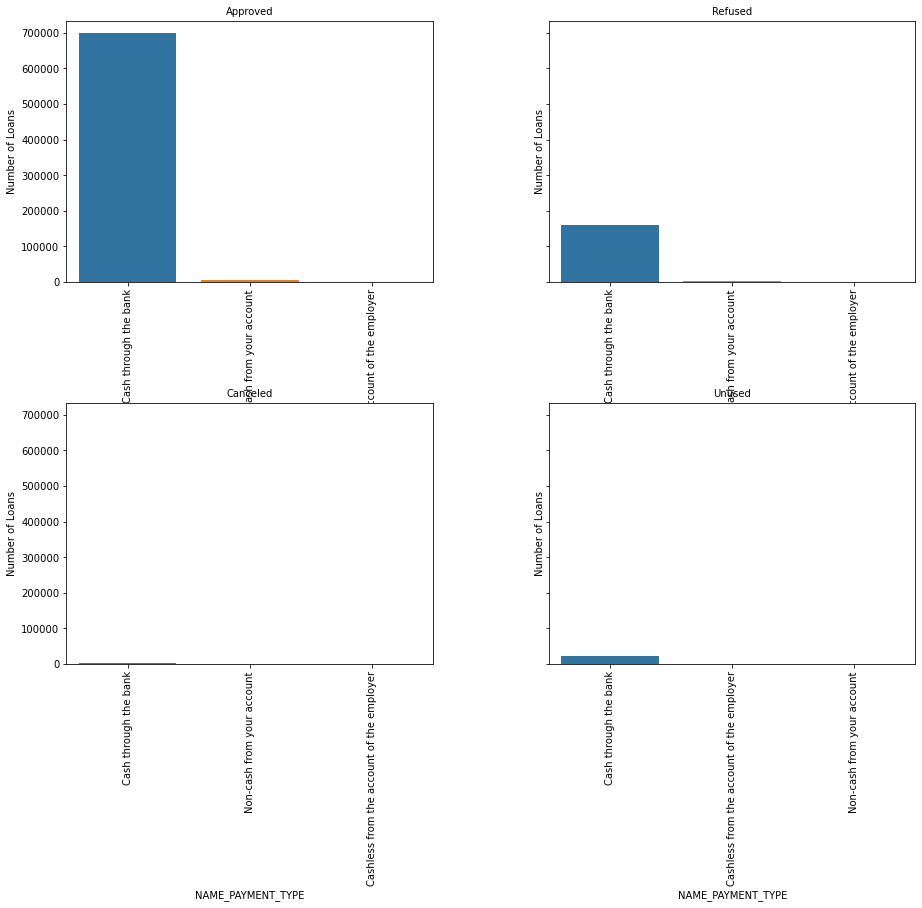

In [112]:
# NAME_PAYMENT_TYPE  VS CONTRACT_STATUS
multi_plot('NAME_PAYMENT_TYPE')

Here we can see that the people are taking more loan in format of cash through the bank

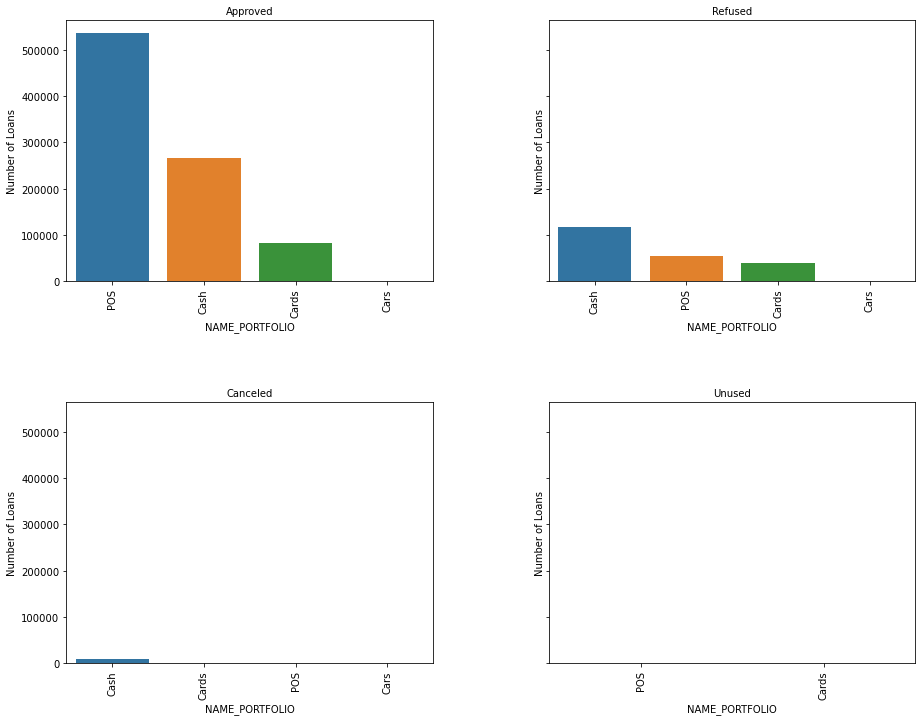

In [113]:
# NAME_PORTFOLIO VS CONTRACT_STATUS
multi_plot('NAME_PORTFOLIO')

Here most approved loan were through POS and Most refused loans were in cash.

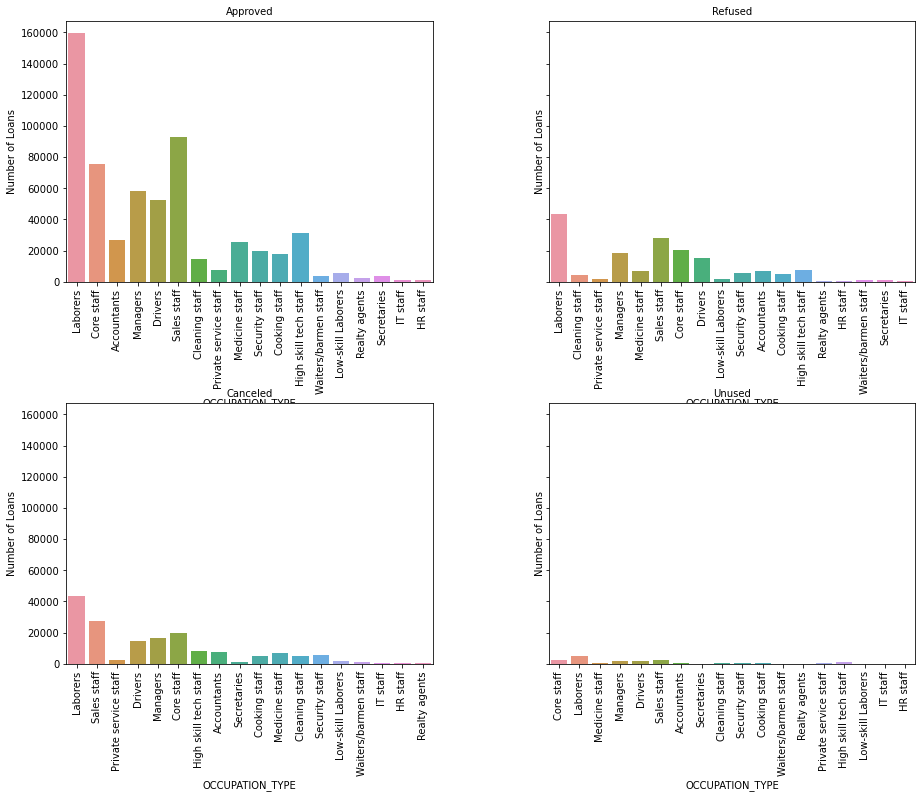

In [114]:
# OCCUPATION_TYPE VS CONTRACT_STATUS
multi_plot('OCCUPATION_TYPE')

Here laborers are getting most refused and most approved loans. And aslo Sales staff is also getting the second most refused and approved loans.

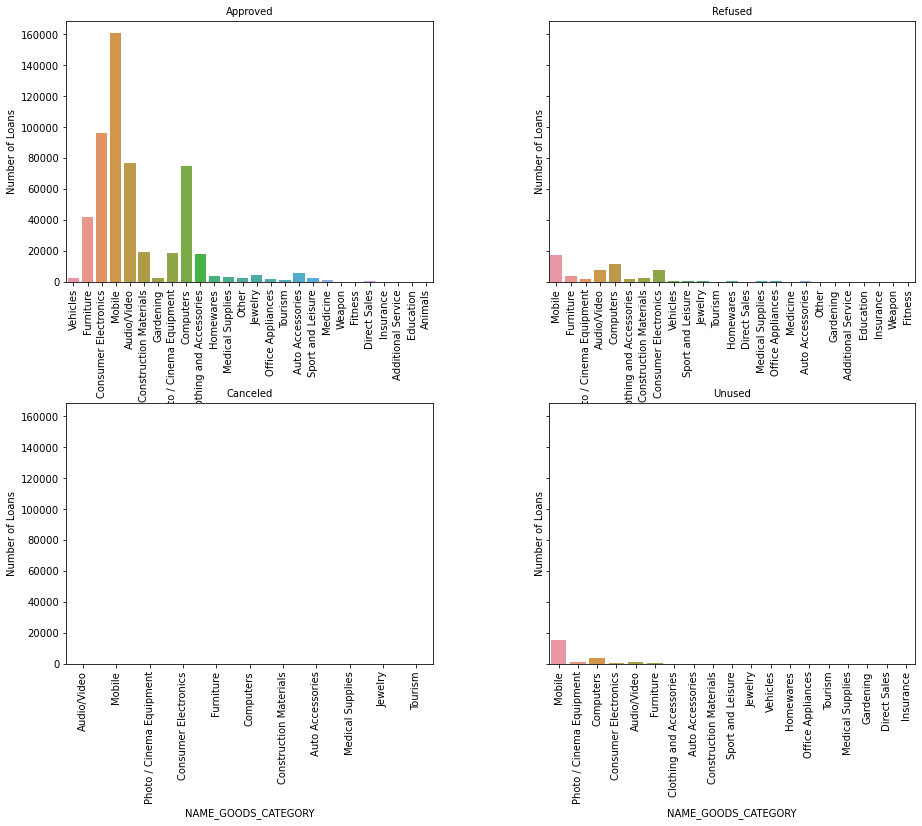

In [115]:
# NAME_GOODS_CATEGORY VS CONTRACT_STATUS
multi_plot('NAME_GOODS_CATEGORY')

Here Most Refused loan is of Mobile and most approved loan and also unused loan is Mobile

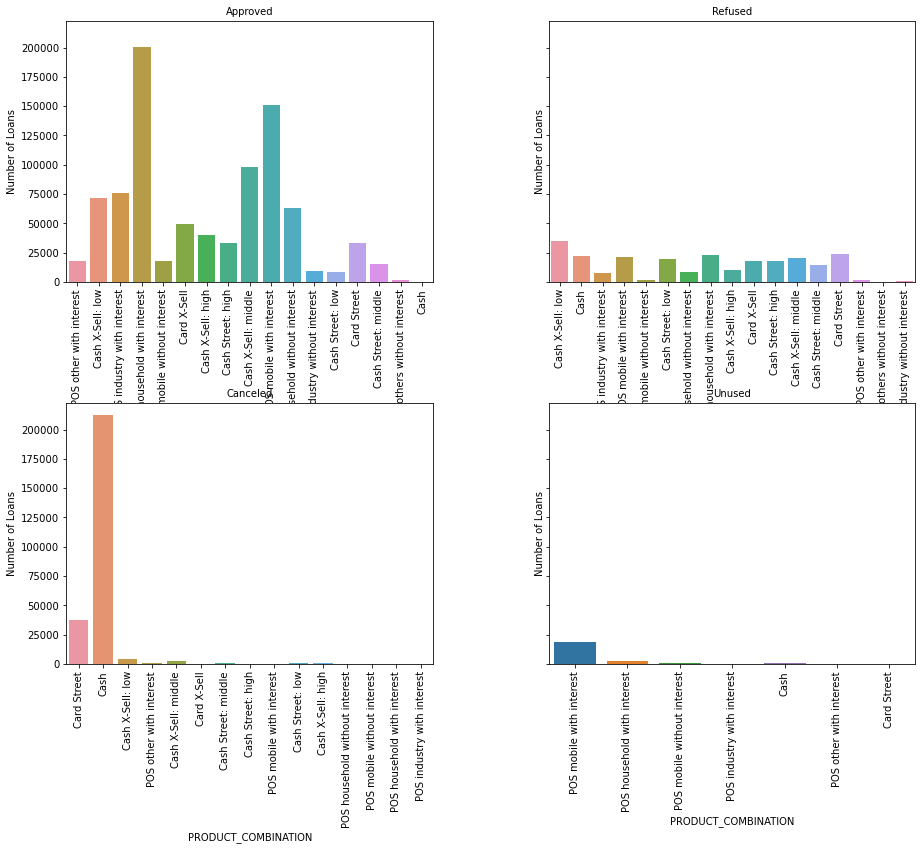

In [116]:
# PRODUCT_COMBINATION VS CONTRACT_STATUS
multi_plot('PRODUCT_COMBINATION')

The most accepting loan is POS Householdith interest and most refused loan is Cash X-sell: low And most canceled loan is Cash and Most Unused loan is POS mobile with interest.